In [61]:
from scipy import integrate
from scipy.stats import norm
import numpy as np

# Lista 3

### UTILS

In [123]:
def normalDist(x, mu, sigma, mean=False, meanSqrX=False):
  normalFactor = 1/(sigma * np.sqrt(2 * np.pi))
  expFactor = np.exp(-(1/2) * (((x - mu)/sigma) ** 2))
  if mean: return x * normalFactor * expFactor
  if meanSqrX: return (x**2) * normalFactor * expFactor
  return normalFactor * expFactor

def uniformDist(x, a, b, mean=False, meanSqrX=False):
  if (a <= x and x <= b):
    if mean: return x/(b-a)
    if meanSqrX: return (x**2)/(b-a)
    return 1/(b-a)
  return 0

def exponDist(x, l, mean=False, meanSqrX=False):
  if (x >= 0): 
    if mean: return x * (1/l) * np.exp(-(1/l) * x)
    if meanSqrX: return (x**2) * (1/l) * np.exp(-(1/l) * x)
    return (1/l) * np.exp(-(1/l) * x)
  return 0

def meanProbabFunction(probabFunction, args):
  if probabFunction == 'exponDist':
    return integrate.quad(exponDist, -np.inf, np.inf, args=(args['l'], args['mean'], args['meanSqrX']))
  elif probabFunction == 'uniformDist':
    return integrate.quad(uniformDist, -np.inf, np.inf, args=(args['a'], args['b'], args['mean'], args['meanSqrX']))
  elif probabFunction == 'normalDist':
    return integrate.quad(normalDist, -np.inf, np.inf, args=(args['mu'], args['sigma'],  args['mean'], args['meanSqrX']))
  return False

### Exercicio 1

In [116]:
mu = 2
sigma = 0.4

Ia = integrate.quad(normalDist, -np.inf, 1.8, args=(mu,sigma))[0]
print(Ia)

Ib = integrate.quad(normalDist, 1.8, 2.1, args=(mu,sigma))[0]
print(Ib)

Ic = integrate.quad(normalDist, 2.3, np.inf, args=(mu, sigma))[0]
print(Ic)


0.3085375387259873
0.29016878695693693
0.22662735237686837


### Exercicio 3

In [117]:
l = 8

Ia = integrate.quad(exponDist, 10, np.inf, args=(l))[0]
print(Ia)

Ib = integrate.quad(exponDist, -np.inf, l, args=(l))[0]
print(Ib)

Ic = integrate.quad(exponDist, 5, 11, args=(l))[0]
print(Ic)

0.2865047968601901
0.6321205588282045
0.2824218327142438


### Exercicio 5

In [122]:
m = meanProbabFunction('uniformDist', args={'a':5, 'b':7, 'mean': True, 'meanSqrX':False})[0]
print(m)

Ex2 = meanProbabFunction('uniformDist', args={'a':5, 'b':7, 'mean': False, 'meanSqrX':True})[0]
v = Ex2 - m**2
print(v)

5.999999999999957
0.33333333333329307


### Exercicio 6

In [142]:
mu = 29.5
sigma = 2.5

perc = 0.05
cum = 0
t0 = 0.001
dt = 0.0005
while cum < perc:
  I = integrate.quad(normalDist, t0, t0+dt, args=(mu, sigma))[0]
  t0+=dt
  cum+=I

print(t0)

25.38799999998618


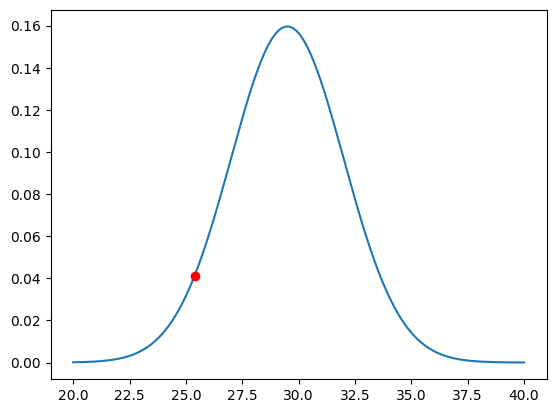

In [143]:
import matplotlib.pyplot as plt
x = np.linspace(20, 40, 1000)
plt.plot(x, normalDist(x, mu, sigma))
plt.plot(t0, normalDist(t0, mu, sigma), 'or')
plt.show()

### Exercicio 8

In [144]:
a = 345
b = 355
Ia = integrate.quad(uniformDist, 353, np.inf, args=(a,b))[0]
print(Ia)

Ib = integrate.quad(uniformDist, -np.inf, 346, args=(a,b))[0]
print(Ib)

rotulo = 350
Ic = 1 - integrate.quad(uniformDist, rotulo-4, rotulo+4, args=(a,b))[0]
print(Ic)

0.20000000000023335
0.1
0.19999999999999984


### Exercicio 9

In [147]:
l = 12
Ia = 1 - integrate.quad(exponDist, 0, 10, args=(l))[0]
print(Ia)

Ib = integrate.quad(exponDist, 0, 8, args=(l))[0]
print(Ib)

0.4345982085070782
0.48658288096740787
